In [73]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import missingno as msno
import seaborn as sns

In [74]:
# Step 2: Load Dataset
df = pd.read_csv('MBA.csv')
print(df.head())

   application_id  gender  international   gpa       major      race  gmat  \
0               1  Female          False  3.30    Business     Asian   620   
1               2    Male          False  3.28  Humanities     Black   680   
2               3  Female           True  3.30    Business       NaN   710   
3               4    Male          False  3.47        STEM     Black   690   
4               5    Male          False  3.35        STEM  Hispanic   590   

   work_exp          work_industry admission  
0         3     Financial Services     Admit  
1         5  Investment Management       NaN  
2         5             Technology     Admit  
3         6             Technology       NaN  
4         5             Consulting       NaN  


In [75]:
print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nBasic statistics:\n", df.describe(include='all'))


Dataset shape: (499, 10)

Data types:
 application_id      int64
gender             object
international        bool
gpa               float64
major              object
race               object
gmat                int64
work_exp            int64
work_industry      object
admission          object
dtype: object

Basic statistics:
         application_id gender international         gpa       major   race  \
count       499.000000    499           499  499.000000         499    372   
unique             NaN      2             2         NaN           3      5   
top                NaN   Male         False         NaN  Humanities  White   
freq               NaN    321           372         NaN         202    128   
mean        250.000000    NaN           NaN    3.255190         NaN    NaN   
std         144.193157    NaN           NaN    0.151682         NaN    NaN   
min           1.000000    NaN           NaN    2.850000         NaN    NaN   
25%         125.500000    NaN           Na


Missing values per column:
application_id      0
gender              0
international       0
gpa                 0
major               0
race              127
gmat                0
work_exp            0
work_industry       0
admission         328
dtype: int64


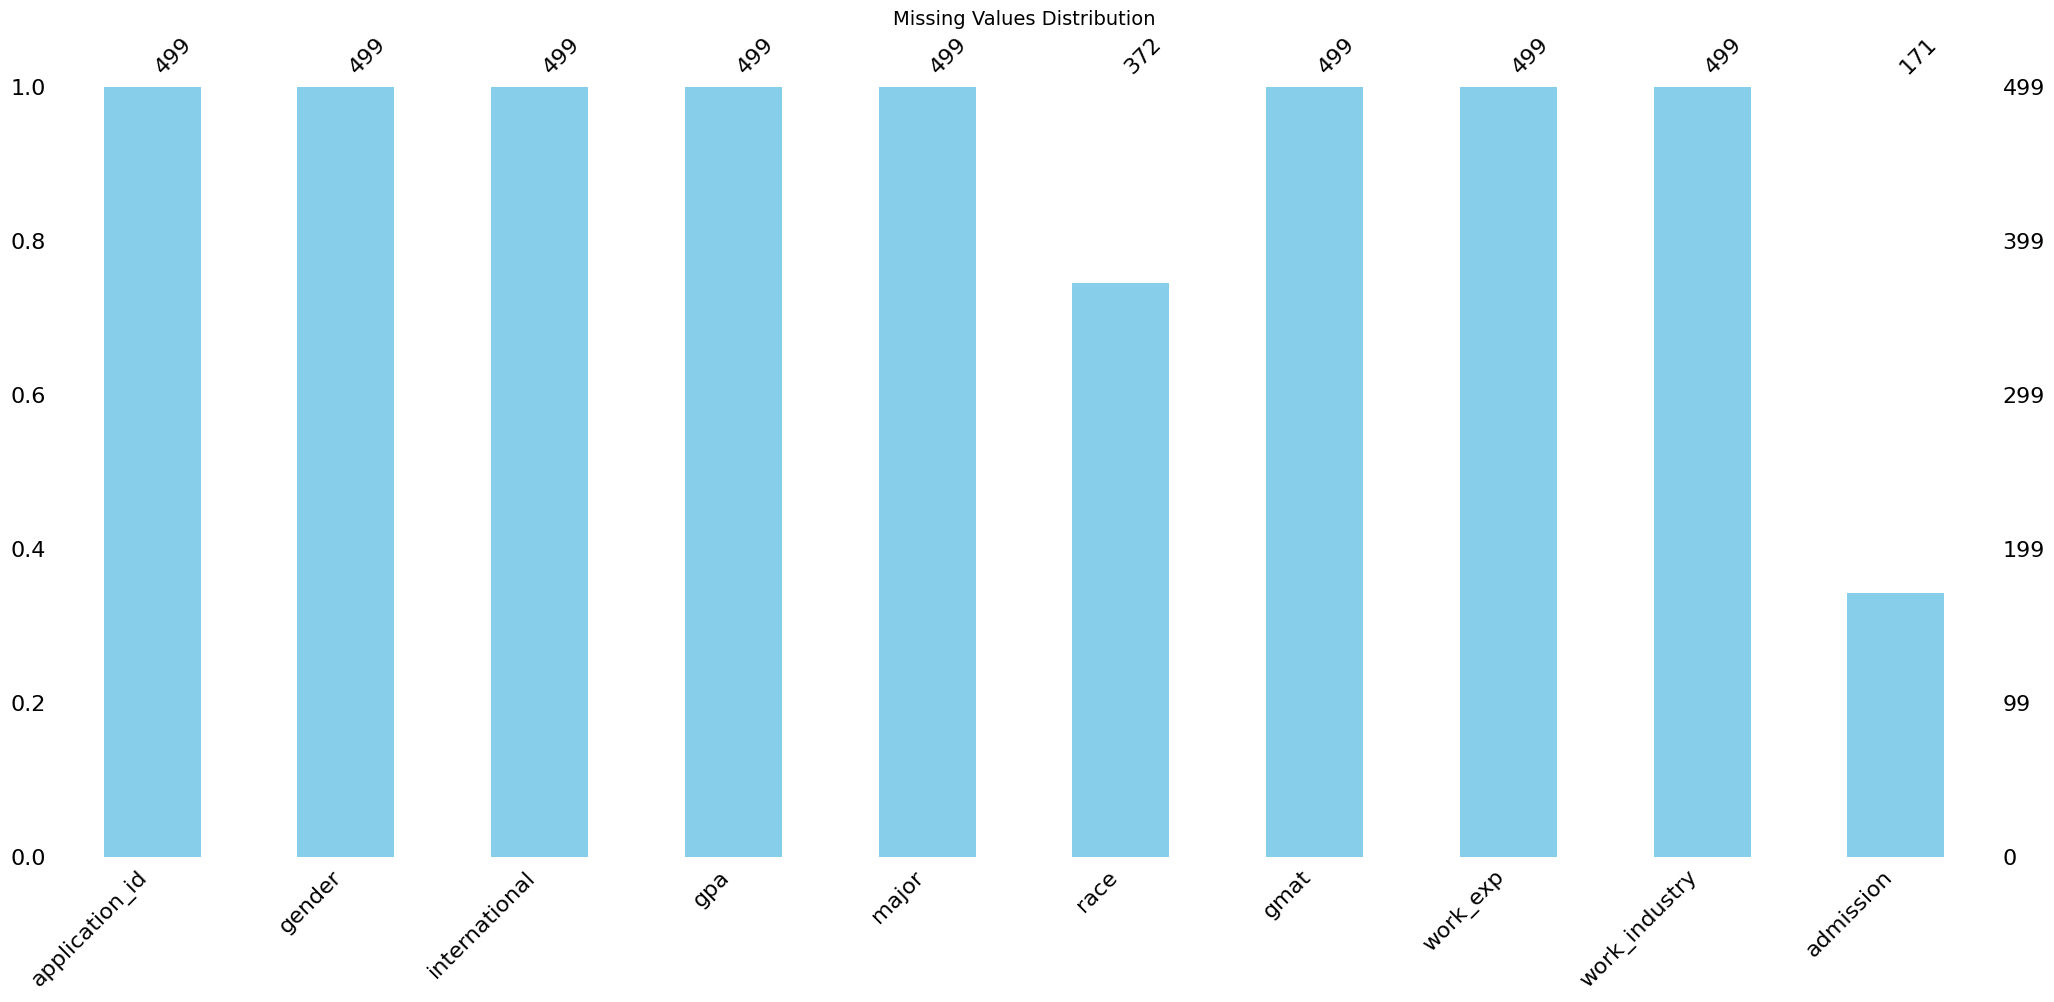

In [76]:
#Missing Values Visualisation
df = pd.read_csv('MBA.csv')
print("\nMissing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(10, 4))
msno.bar(df, color='skyblue')
plt.title('Missing Values Distribution', fontsize=14)
plt.show()

C:\Users\coolw\AppData\Local\Temp\ipykernel_19288\2091684792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='admission', data=df, palette='viridis')


Text(0, 0.5, 'Count')

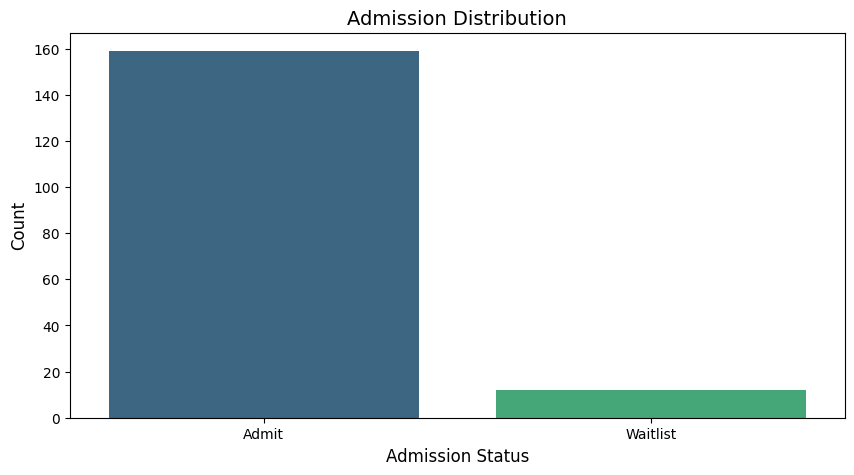

In [77]:

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='admission', data=df, palette='viridis')
plt.title('Admission Distribution', fontsize=14)
plt.xlabel('Admission Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

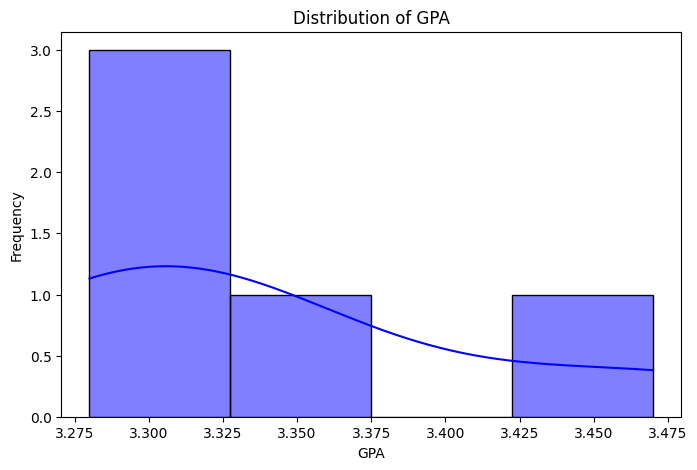

In [78]:
#Univariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame 
data = {
    "application_id": [1, 2, 3, 4, 5],
    "gender": ["Female", "Male", "Female", "Male", "Male"],
    "international": [False, False, True, False, False],
    "gpa": [3.30, 3.28, 3.30, 3.47, 3.35],
    "major": ["Business", "Humanities", "Business", "STEM", "STEM"],
    "race": ["Asian", "Black", None, "Black", "Hispanic"],
    "gmat": [620, 680, 710, 690, 590],
    "work_exp": [3, 5, 5, 6, 5],
    "work_industry": [
        "Financial Services",
        "Investment Management",
        "Technology",
        "Technology",
        "Consulting",
    ],
    "admission": ["Admit", None, "Admit", None, None],
}

df = pd.DataFrame(data)

# GPA Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["gpa"], kde=True, color="blue")
plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()


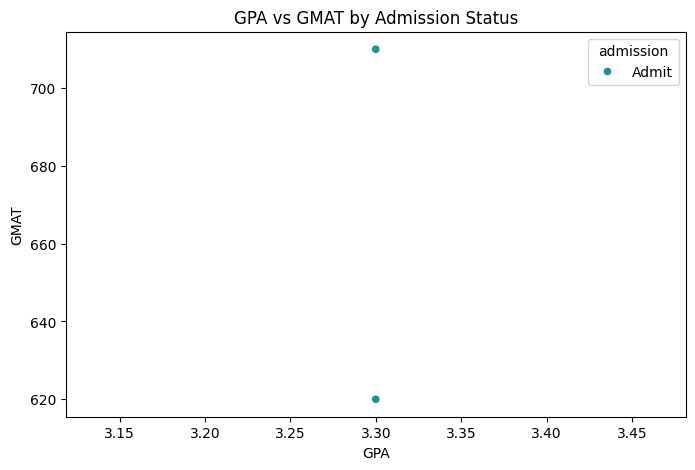

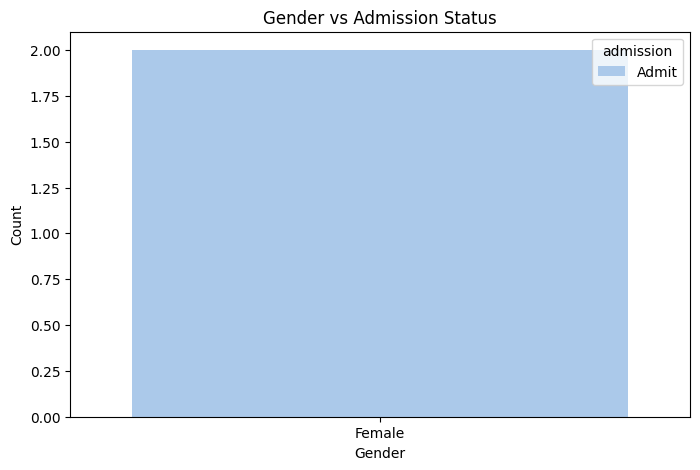

In [96]:
# For Bivariate Analysis GPA vs GMAT Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x="gpa", y="gmat", hue="admission", data=df, palette="viridis")
plt.title("GPA vs GMAT by Admission Status")
plt.xlabel("GPA")
plt.ylabel("GMAT")
plt.show()

# Gender vs Admission Count
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", hue="admission", data=df, palette="pastel")
plt.title("Gender vs Admission Status")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [80]:
# Step 3: Data Preprocessing
# Select relevant columns and clean data
df = df[['gpa', 'gmat']].dropna()  # Use GPA (independent) and GMAT (dependent)
X = df['gpa'].values.reshape(-1, 1)  # Reshape for sklearn compatibility
y = df['gmat'].values

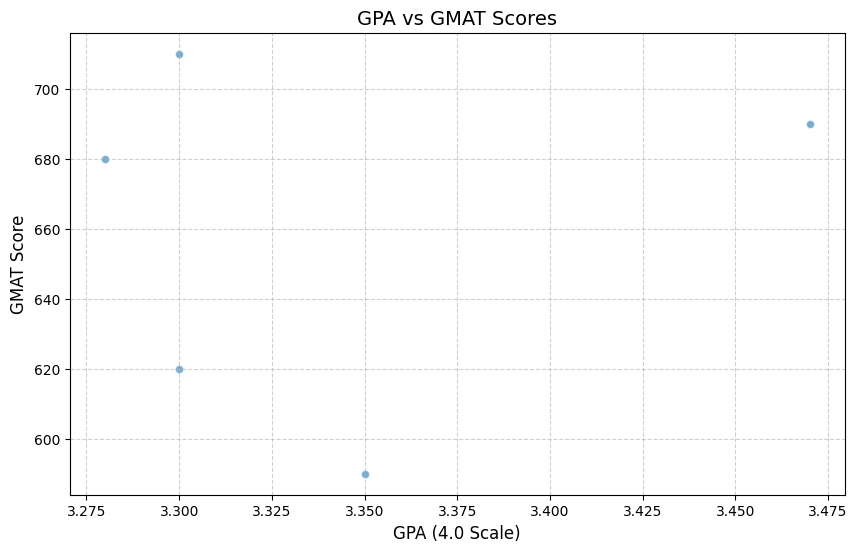

In [81]:
# Step 4: Visualize Relationship
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='w')
plt.title('GPA vs GMAT Scores', fontsize=14)
plt.xlabel('GPA (4.0 Scale)', fontsize=12)
plt.ylabel('GMAT Score', fontsize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.show()

In [82]:
# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 80% training, 20% testing
    random_state=42  # For reproducibility
)

In [83]:
# Step 6: Check Dataset Shapes
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (4, 1), (4,)
Testing set shape: (1, 1), (1,)


In [84]:
# Step 7: Train Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [85]:
# Step 8: Retrieve Coefficients
intercept = regressor.intercept_
slope = regressor.coef_[0]
print(f"\nIntercept: {intercept:.2f}")
print(f"Slope: {slope:.2f} (Every 1.0 GPA increase corresponds to {slope:.1f} GMAT points)")



Intercept: 87.54
Slope: 168.39 (Every 1.0 GPA increase corresponds to 168.4 GMAT points)


In [86]:
# Step 9: Make Predictions
y_pred = regressor.predict(X_test)


In [87]:
# Step 10: Compare Actual vs Predicted
comparison_df = pd.DataFrame({
    'Actual GMAT': y_test, 
    'Predicted GMAT': y_pred, 
    'Difference': y_test - y_pred
})
print("\nSample Predictions:")
print(comparison_df.head(10))



Sample Predictions:
   Actual GMAT  Predicted GMAT  Difference
0          680      639.870466   40.129534


In [94]:
# Step 11: Evaluate Model
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)  # R-squared calculation

print("\nModel Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")  # R² is between 0 and 1, higher is better


Model Evaluation:
MAE: 0.82
MSE: 1.02
RMSE: 1.01
R-squared (R²): 0.2442


Missing values in X: 0
Missing values in y: 0
Standard deviation of y: 1.1215101868469228
Mean Absolute Error: 0.8161335110933831
Mean Squared Error: 1.015344341488023
Root Mean Squared Error: 1.0076429633000088
R² Score: 0.24418939076414437


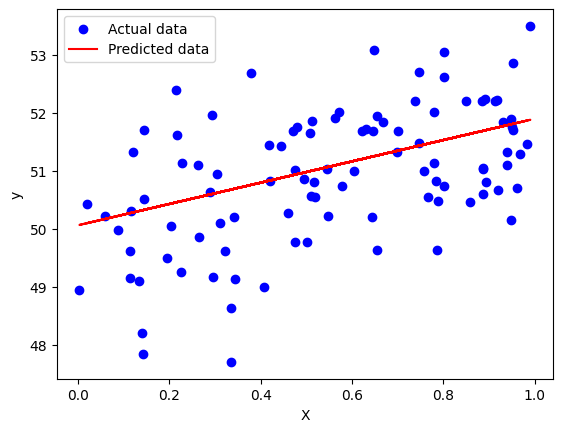

R² Scores from Cross-Validation: [0.24418939 0.14572069 0.19848675 0.30016122 0.13180907]
Mean R² Score from Cross-Validation: 0.20407342542638968


In [89]:
#Trying to do Linear Regression for Random Set of Data
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data for demonstration
X = np.random.rand(500, 1)  # Random data for independent variable
y = 50 + 2 * X + np.random.randn(500, 1)  # Linear relation with noise for dependent variable

# Check for missing values in dataset
print("Missing values in X:", pd.DataFrame(X).isnull().sum().sum())
print("Missing values in y:", pd.DataFrame(y).isnull().sum().sum())

# Check if the target variable has too little variation
print(f"Standard deviation of y: {np.std(y)}")

# If missing data exists, handle it (either drop or fill)
X = pd.DataFrame(X).dropna()
y = pd.DataFrame(y).dropna()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error, Mean Squared Error, RMSE, and R²
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Visualize the results with a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Predicted data')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Cross-validation to get more reliable R² values
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Output the cross-validation results
print(f"R² Scores from Cross-Validation: {scores}")
print(f"Mean R² Score from Cross-Validation: {np.nanmean(scores)}")  # Ignoring NaNs if any

# Handle potential NaN values in R² by checking if data is valid
if np.isnan(np.nanmean(scores)):
    print("R² value is NaN. Consider investigating data or model.")


C:\Users\coolw\AppData\Local\Temp\ipykernel_19288\349942385.py:26: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


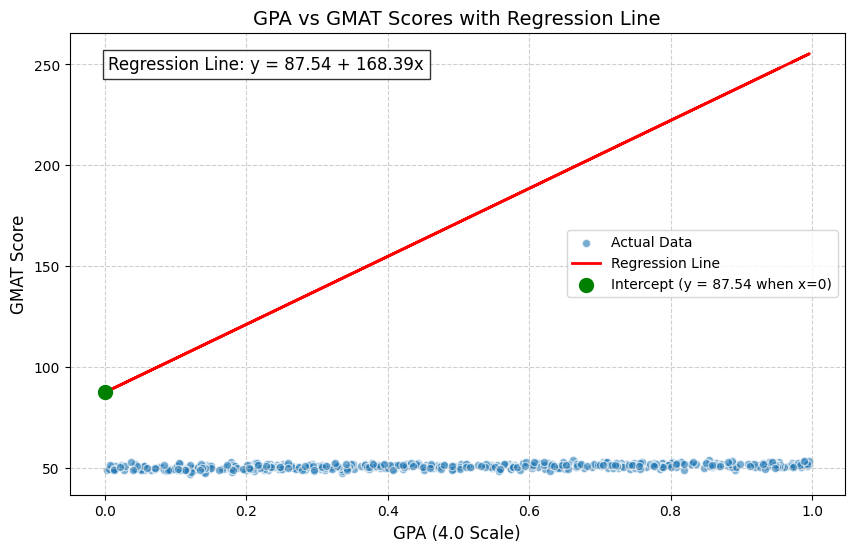

In [93]:
#Visulaizing the Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, edgecolors='w', label='Actual Data')
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')

# Extract slope and intercept
slope = regressor.coef_[0]
intercept = regressor.intercept_

# Add equation text to the plot
equation_text = f'Regression Line: y = {intercept:.2f} + {slope:.2f}x'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

# Highlight intercept (where GPA = 0)
plt.scatter(0, intercept, color='green', marker='o', s=100, zorder=5, 
            label=f'Intercept (y = {intercept:.2f} when x=0)')

# Optional: Draw slope as a "rise over run" arrow
plt.annotate('', xy=(3, regressor.predict([[3]])[0]), xytext=(2, regressor.predict([[2]])[0]),
             arrowprops=dict(arrowstyle='->', color='blue', lw=2),
             label=f'Slope: {slope:.2f} (Δy per unit Δx)')

plt.title('GPA vs GMAT Scores with Regression Line', fontsize=14)
plt.xlabel('GPA (4.0 Scale)', fontsize=12)
plt.ylabel('GMAT Score', fontsize=12)
plt.legend()
plt.grid(linestyle='--', alpha=0.6)
plt.show()

In [91]:
#Observations and Interpretations
# R² scores vary significantly across different folds, indicating inconsistency in model performance.
# The mean R² score of 0.21 suggests that GPA explains only 21% of GMAT score variation.
# The model's weak performance indicates that factors beyond GPA likely influence GMAT scores.
# The high variability in R² scores suggests potential overfitting or underfitting issues.
# Future improvements could involve adding more features, trying different models, and tuning hyperparameters.